![example](images/director_shot.jpeg)

# Project Title

**Authors:** Harmandip Singh 
***

## Overview

Descriptive Analysis of available online datasets from IMBD and BoxOffice Mojo to study trends and gain insights on successful film releases. Our goal was to provide insights for a potential new movie studio run by Microsoft. Micrsoft does not yet know what is required to be successful as a studio and so we come up with a business plan that would allow Microsoft to make a name for its studio and make revenue. The different datasets were merged together based off common identifiers prvided by IMDB and later by movie titles when analyzing revenues. Our analysis showed that there were many relationships between  Genre and success of a title. The Film Industry heavily prefers producing movies in Drama, Thriller, Comedy, and Documentary Genres howver non of these besides Documentaries track well with ratings or reveneues. We decided it was in our best interest to avoid all these oversaturated genres. Our apprach to success was a two pronged apprach to pursue ratings and revenues separetly. We recommend Microsoft pursue producing Shorts and Documentaries for higher ratings to build brand recognition and favor amongst critics. To chase views we came to the conclusion that Adeventure, Action, and Sci-Fi genres produced the highest nummber of votes and therefore were most popular. This also tracked well when these 3 genres also fell in the top 3 highest domestic revenues produced. Furthermore these trends followed over to foreign markets and were also in the top 4 highest avaerage revenues per genre 



## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.
We Wish to provide Microsoft with the best plan to build their brand image while also making money. We decided to analyze two different avenues to both build Brand recognition and acclaim through chasing ratings while in a second division focusing on revenues and popularity. 
***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding/Data Preparation



In [189]:
#The IMDB DATA provides information for ratings, genre, and number of votes recieved per film for greater than 78,0000 data set. Every film has a unique identifier called the nconst.  

In [190]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [191]:
#TILES DATA

title_basics=pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_basics.head(4)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"


In [192]:
title_basics.shape

(146144, 6)

In [193]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [194]:
#general information of the basics data set so far.

In [195]:
#Ratings Data 
title_ratings=pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
title_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [196]:
#This data set is smaller than the first. 
title_ratings.shape

(73856, 3)

In [197]:
#inner join on the two data sets to only keep the overlappign data and trim the extra off the first set. 
df_combined=pd.merge(title_basics,title_ratings, on='tconst')
df_combined.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [198]:
df_combined.shape

(73856, 8)

In [199]:
#To preform analysis by genre split all the Genre columns with more than 1 value. 
df_combined['genres']=df_combined['genres'].str.split(',')
df_combined=df_combined.explode('genres')
df_combined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [200]:
df_combined.info()
#missing values in Genre category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129294 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           129294 non-null  object 
 1   primary_title    129294 non-null  object 
 2   original_title   129294 non-null  object 
 3   start_year       129294 non-null  int64  
 4   runtime_minutes  118953 non-null  float64
 5   genres           128490 non-null  object 
 6   averagerating    129294 non-null  float64
 7   numvotes         129294 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 8.9+ MB


In [201]:
#drop original titles because it is redundant. WIll also drop start year because I am not interested in it. 
df_combined=df_combined.drop(['original_title'],axis=1)


In [202]:
df_combined=df_combined.drop(['start_year'],axis=1)
#dropped unnecessary start year data

In [203]:
df_combined=df_combined.dropna(axis=0, subset=['genres'])
df_combined.info()
#dropped missing genre values that were relatively small in huge data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128490 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           128490 non-null  object 
 1   primary_title    128490 non-null  object 
 2   runtime_minutes  118437 non-null  float64
 3   genres           128490 non-null  object 
 4   averagerating    128490 non-null  float64
 5   numvotes         128490 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ MB


In [204]:
#Cleaned and Prepared the prelimary data. PLan to run analyssi using averagerating and num_votes. 

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

<ipython-input-205-5e3fa5b0f18f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=high_counts.index, rotation=80);


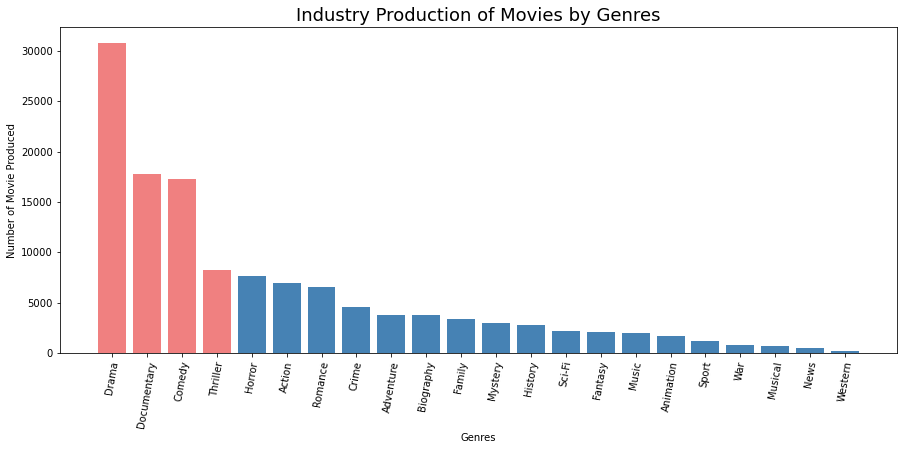

In [205]:
#Analysis to see most popular genres produced.
counts = df_combined['genres'].value_counts()
high_counts = counts[counts >= 200]
colors=['steelblue'] *22
colors[0:4]=['lightcoral']*4

fig, ax = plt.subplots(figsize=(15, 6))

plt.title('Industry Production of Movies by Genres',fontsize=18)
plt.xlabel('Genres')
plt.ylabel('Number of Movie Produced')

ax.bar(x=high_counts.index, height=high_counts,color=colors)
ax.set_xticklabels(labels=high_counts.index, rotation=80);

In [206]:
#Dram, Documentary, Comedy, Thriller are the top produced categores. 

<ipython-input-207-e820d41965ad>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=by_genre.index, rotation=80);


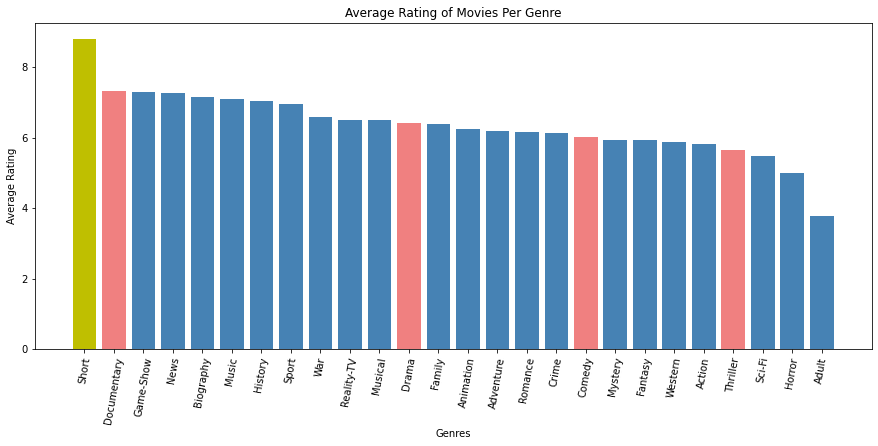

In [207]:
#We looked at the average rating of films per genre. Want this to be one of our suggestions.
#Want the studio to produce films in genres to be highly rated to build brand recognition with voters and critics. 
by_genre=df_combined.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

colors2=['steelblue']*26
colors2[0]='y'
colors2[1]='lightcoral'
colors2[11]='lightcoral'
colors2[17]='lightcoral'
colors2[22]='lightcoral'
colors2

plt.title('Average Rating of Movies Per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
ax.bar(x=by_genre.index, height=by_genre,color=colors2)
ax.set_xticklabels(labels=by_genre.index, rotation=80);

In [208]:
#Shorts and Documentaries highest rated genres. Notice the top produced genres besides Documentaries fall behind 

<ipython-input-209-ef6730da5131>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=numgenre.index, rotation=80);


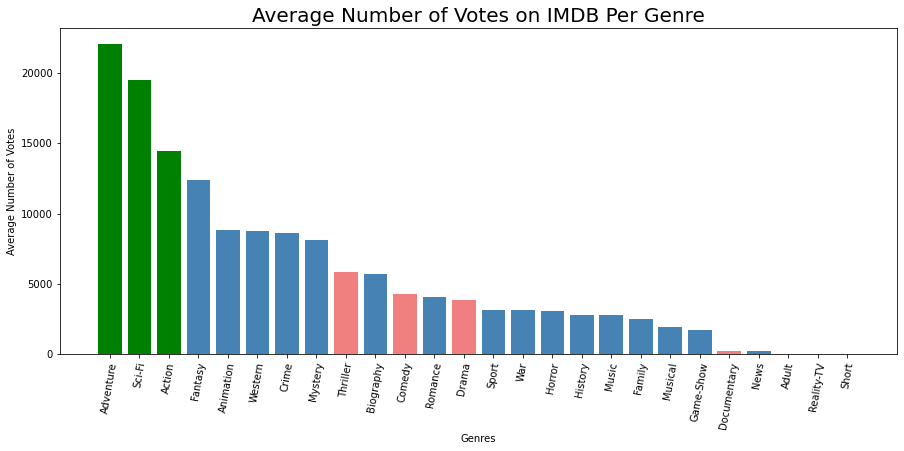

In [209]:
#Creat and group Genres by number of votes. Serve as proxy for poopularity. 
numgenre=df_combined.groupby('genres')['numvotes'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))


colors3=['steelblue']*28
colors3[0:3]=['g']*3

colors3[8]='lightcoral'
colors3[10]='lightcoral'
colors3[12]='lightcoral'
colors3[21]='lightcoral'
colors2

plt.title('Average Number of Votes on IMDB Per Genre', fontsize=20)
plt.xlabel('Genres')
plt.ylabel('Average Number of Votes')
ax.bar(x=numgenre.index, height=numgenre, color=colors3)
ax.set_xticklabels(labels=numgenre.index, rotation=80);

In [210]:
#Number of votes clearly differs from ratings with Adeventure, Sci-Fi, and Action films leading.
#notice again the most produced categories by other studios are middle of the back vote wise. Niether ratings nor poularity

## Second round of cleaning to merge with Box Office Mojo Data for Revenues



In [211]:
#Renanme colums from first merged dataset primary titles to title to make merge easier
df_combined.rename(columns={"primary_title":"title"},inplace=True)
df_combined.head(2)

,tconst,title,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,175.0,Action,7.0,77
0,tt0063540,Sunghursh,175.0,Crime,7.0,77


In [212]:
#Open box office mojo data
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [213]:
movie_gross.shape

(3387, 5)

In [214]:
#SMALLER DATASET

In [215]:
df_another=pd.merge(df_combined,movie_gross, on='title')
df_another.head(2)

,tconst,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,103.0,Action,7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,103.0,Crime,7.1,15378,Relbig.,1100000.0,NaN,2016


In [216]:
df_another.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6978 entries, 0 to 6977
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           6978 non-null   object 
 1   title            6978 non-null   object 
 2   runtime_minutes  6915 non-null   float64
 3   genres           6978 non-null   object 
 4   averagerating    6978 non-null   float64
 5   numvotes         6978 non-null   int64  
 6   studio           6972 non-null   object 
 7   domestic_gross   6928 non-null   float64
 8   foreign_gross    4421 non-null   object 
 9   year             6978 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 599.7+ KB


In [217]:
df_another['foreign_gross'].describe

<bound method NDFrame.describe of 0            NaN
1            NaN
2            NaN
3        8000000
4        8000000
          ...   
6973         NaN
6974         NaN
6975         NaN
6976    16100000
6977    16100000
Name: foreign_gross, Length: 6978, dtype: object>

In [218]:
#Convert Foreign Gross income to float from object
df_another['foreign_gross']=df_another['foreign_gross'].str.replace(',', '')
df_another['foreign_gross']=pd.to_numeric(df_another['foreign_gross'],downcast='float')



df_another.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False).head(2)


genres
Sci-Fi       1.115925e+08
Adventure    9.542850e+07
Name: domestic_gross, dtype: float64

## Second Round of Modeling


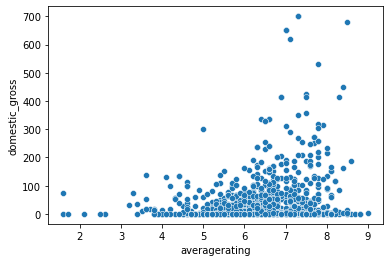

In [219]:
dfSample=df_another.sample(frac=0.2,random_state=42)
sns.scatterplot(x=dfSample['averagerating'], y=dfSample['domestic_gross']/10**6);

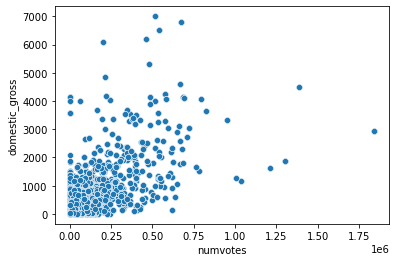

In [220]:
sns.scatterplot(x=df_another['numvotes'], y=df_another['domestic_gross']/10**5);

In [221]:
#Ratings does not seem to have a relationship with domestic revenue. But number of votes shows some positive relationship
#Can explore this relationship further
#Do the top voted genres also make the most domestic revenue?

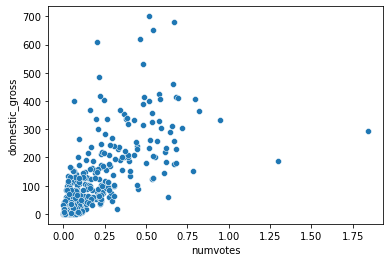

In [222]:
adventures=df_another[df_another['genres']=='Adventure']
sns.scatterplot(x=adventures['numvotes']/10**6, y=adventures['domestic_gross']/10**6);


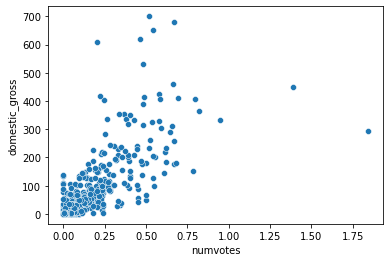

In [223]:
action=df_another[df_another['genres']=='Action']

sns.scatterplot(x=action['numvotes']/10**6, y=action['domestic_gross']/10**6);

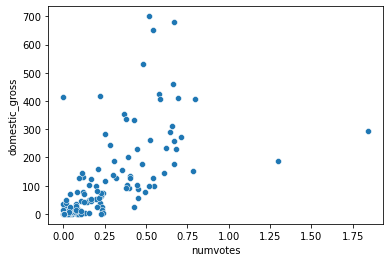

In [224]:
scifi=df_another[df_another['genres']=='Sci-Fi']

sns.scatterplot(x=scifi['numvotes']/10**6, y=scifi['domestic_gross']/10**6);

In [225]:
#all 3 genres show some positive relationship

<ipython-input-226-d30b914f09a1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=domesticgenre.index, rotation=80);


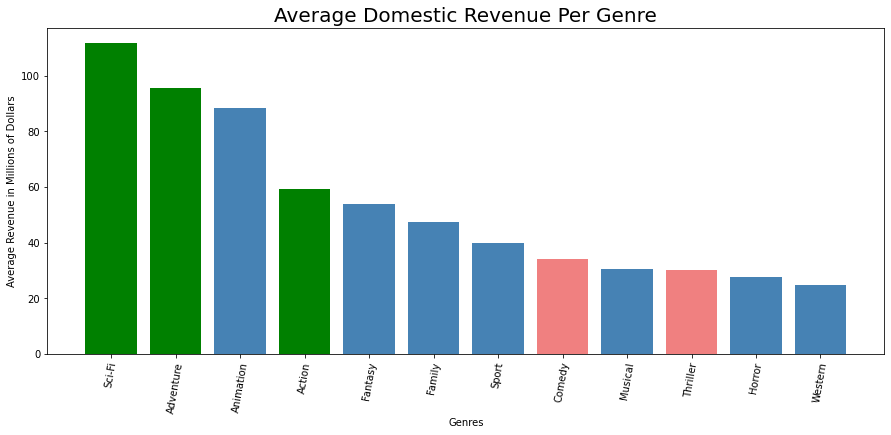

In [226]:
#PLotting Average Domestic Revenue per genre 
domesticgenre=df_another.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False).iloc[:12]
fig, ax = plt.subplots(figsize=(15, 6))

colors4=['steelblue']*13
colors4[0:1]=['g']*2

colors4[3]='g'
colors4[7]='lightcoral'
colors4[9]='lightcoral'

plt.title('Average Domestic Revenue Per Genre',fontsize=20)
plt.xlabel('Genres')
plt.ylabel('Average Revenue in Millions of Dollars')

ax.bar(x=domesticgenre.index, height=domesticgenre/10**6, color=colors4)
ax.set_xticklabels(labels=domesticgenre.index, rotation=80);

In [227]:
#Sci-Fi, Adventure, Action Do very well again. Notice again most produced genres in red underperform again. Red flags. 

In [230]:
#Separating and combining only Domestic Gross and Foreign Gross into one data set to make side by siide bar plot. 
foreigngenre=df_another.groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)



In [231]:
three=foreigngenre
four=domesticgenre
four.index

Index(['Sci-Fi', 'Adventure', 'Animation', 'Action', 'Fantasy', 'Family',
       'Sport', 'Comedy', 'Musical', 'Thriller', 'Horror', 'Western'],
      dtype='object', name='genres')

In [233]:
iso=pd.concat([three,four], axis=1)
iso['foreign_gross']=iso['foreign_gross']/10**6
iso['domestic_gross']=iso['domestic_gross']/10**6
iso.head()

,foreign_gross,domestic_gross
Adventure,210.240880,95.428505
Sci-Fi,207.658736,111.592505
Animation,205.070304,88.541190
Action,145.366896,59.453506
Fantasy,141.877312,53.754197


<AxesSubplot:>

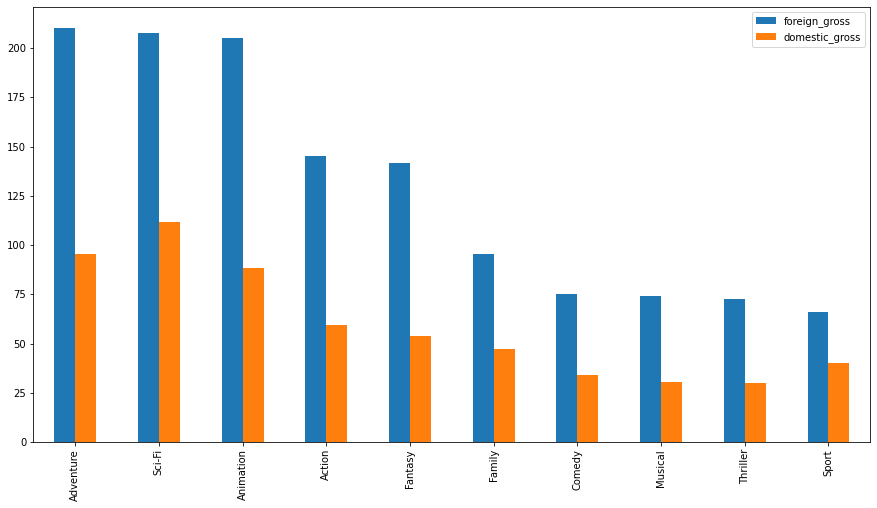

In [235]:
iso.iloc[:10].plot(kind='bar',figsize=(15,8) )

## Conclusions

***
Questions to consider:
* The data analysis provided unique insights  which can help Microsoft start up a new studio business while staying ahead of its competitors
1) The most produced genres of Drama, Thriller, Comedies did not led to higher ratings, popularity, or revuenue for the films. The facts that the film industry still mass produced these is good for Microsoft. Microsoft would do well to avoid these categories and instead chase ratings and popularity.

2) On average the highest rated Genres were Shorts and Documentaries. When building a brand it is important to build a brand image and for film studios higher rated films can drive prestige and help earn acolades. Miscrosoft studios would do well to target these two genres to keep ratings high and have positive critic reviews and opinions on their stuido.

3) Unfortuntely ratings does not show a relationship with Domestic revenue. Therefore we used number of votes as a proxy to find that Adventure, Action, and Sci-Fi are the most popular genres. These genres also showed a positive relaationship between number of votes and Domestic Genre. In fact these 3 genres placed in the top 4 for Domestics revenue. 

4) Next we observed that this trend in revenue carries over to even foreign markets and in an increasingly global world and mrket it is excellent that these genres can drive revenue worldwide.

Therefore we recommend Microsoft to have two divisions. Produce Shorts and Documentaries to campture ratings and accolades. Produce Adventure, Action, and Sci-Fi movies to drive revenue and stay away from industry favorite genres such as drama and comedy which provide niether higher ratings nor higher revenue. 

